Name: Praveenkumar Reddy
 

THE SPARK FOUNDATION

PREDICTION USING SUPERVISED MACHINE LEARNING

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
url='https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
df=pd.read_csv(url)
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

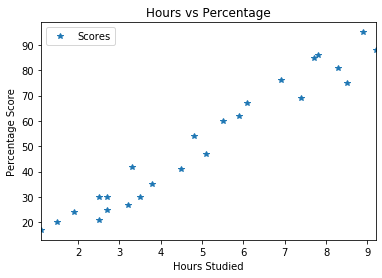

In [7]:
# Plotting the distribution of scores
df.plot(x='Hours', y='Scores', style='*')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [8]:
x=df.drop(['Scores'],axis=1)
y=df['Scores']

In [9]:
x.head()


,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


Slpiting the Data into Test and Train sets.

In [10]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                            test_size=0.2, random_state=0)

Model Training
linear regression

In [11]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(x_train, y_train) 

print("Training complete.")

Training complete.


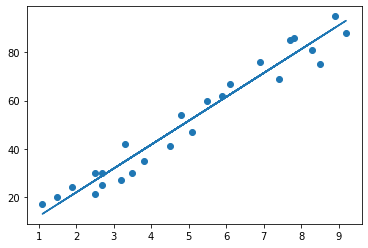

In [12]:
# Plotting the regression line
line = regressor.coef_*x+regressor.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line);
plt.show()

In [13]:
print(x_test) # Testing data - In Hours
y_pred = regressor.predict(x_test) # Predicting the scores

    Hours
5     1.5
2     3.2
19    7.4
16    2.5
11    5.9


In [14]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df1

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


In [15]:
# You can also test with your own data
hours = 9.25
own_pred =regressor.predict([[9.25]])

In [16]:
own_pred

array([93.69173249])

In [17]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975


model validation 

In [18]:
from sklearn.model_selection import cross_val_score
validate=cross_val_score(regressor,x,y, cv=10)

In [19]:
validate

array([ 0.57949692,  0.87945559,  0.86969493,  0.95225096,  0.7219951 ,
        0.97633898,  0.95844674,  0.9458407 ,  0.76271338, -1.49457288])